# Detecção de comunidades

In [1]:
# #Bibliotecas necessárias
# !pip install python-louvain
# !pip install leidenalg
# !pip install cairocffi
# !pip install --upgrade scipy
# !pip install --upgrade networkx[default]

# #No linux precisei instalar antes do pycairo: sudo apt install libcairo2-dev pkg-config python3-dev
# !pip install pycairo

In [15]:
%reload_ext autoreload
%autoreload 2

import community as community_louvain
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import colormaps
import sys
from itertools import combinations
from datetime import datetime
sys.path.append('../utils')
from mapa_estudantes import carregar_estudantes

### Obter o grafo de disciplinas
- Cada nó representa uma disciplina
- Uma aresta da disciplina d1 para disciplina d2 significa que um aluno cursou a disciplina d1 e no periodo seguinte cursou a disciplina d2
- O peso da aresta indica o número de vezes que um aluno cursou a disciplina d1 e no semestre seguinte cursou a disciplina d2

In [35]:
# Obter os dados dos estudantes
estudantes, disciplinas, disciplinas_desconhecidas = carregar_estudantes()

print("Número de Disciplinas: ", len(disciplinas))
print("Número de Estudantes: ", len(estudantes))

estudantes_844 = list(filter(lambda x: x.ingresso > datetime.strptime("01/01/13", "%d/%m/%y"), estudantes.values()))
print("Número de Estudantes: ", len(estudantes_844))
print("FI64C" in disciplinas_desconhecidas)


Carregando 76844 dados de estuadantes
233 disciplinas encontradas na grade 844
64258 dados de estudantes na grade 844
Número de Disciplinas:  184
Número de Estudantes:  1486
Número de Estudantes:  1004
True


In [31]:
# Numero de estudantes com cada status
print(disciplinas_desconhecidas)

status = {}
for estudante in estudantes_844:
    if estudante.status not in status:
        status[estudante.status] = 0
    status[estudante.status] += 1


for s in status:
    print(f"Aluno {s}: {status[s]}")

{'FI74A', 'ELH01', 'ET7FA', 'EL6AB', 'EL64E', 'EL65J', 'IF61F', 'ED70E', 'DI61D', 'EL53G', 'CC62P', 'ES32U', 'DI61B', 'CE66C', 'CE51N', 'CC61B', 'ELEY40', 'AU62M', 'MA74C', 'QB61F', 'EL72E', 'GE72D', 'GE74K', 'CC61L', 'CL73B', 'GE77J', 'CL7DH', 'GE60E', 'CC79B', 'ET61A', 'ELTB3', 'GE73A', 'ME69C', 'EL63B', 'ELP73', 'CL21I', 'DI6BH', 'EL86B', 'GE62A', 'GE73G', 'CC71A', 'ED60D', 'DI66G', 'CC71B', 'CE6AI', 'ME64F', 'MA78K', 'ELN8DG', 'DI64G', 'ET66E', 'DI86C', 'GE70A', 'EF62D', 'ED60B', 'DI82F', 'IF6AD', 'FI64C', 'IF6CN', 'CL21F', 'DI63D', 'DI63L', 'EL66G', 'EA37J', 'EF61C', 'K5D330', 'ES70R', 'GE77I', 'EL66I', 'ET7CL', 'FI56C', 'GE77H', 'GE73F', 'EL84H', 'CC72B', 'CSX30', 'DI62G', 'FI54O', 'ME63H', 'DI6DB', 'EL71E', 'CL72A', 'ET38N', 'GE76J', 'QB62A', 'EL52O', 'ET73F', 'ET77C', 'CE73B', 'GE60G', 'MA74G', 'FI64B', 'GE70E', 'EL65H', 'GE77C', 'MA77J', 'FI52Z', 'CE75Q', 'EL67D', 'ET63D', 'MA73N', 'ES30X', 'CE73D', 'ET53V', 'DI82B', 'DI56B', 'CL70C', 'ET75H', 'ES7AD', 'GE74H', 'CL70B', 'MA71G

In [3]:
digrafo = nx.DiGraph()
digrafo.add_nodes_from([d for d in disciplinas])

# Cria arestas entre as disciplinas cursadas por um estudante
for estudante in estudantes.values():
    for d1, d2 in combinations(estudante.disciplinas, 2):
        if d1.periodo_consecutivo(d2):
            if not digrafo.has_edge(d1.codigo, d2.codigo):
                digrafo.add_edge(d1.codigo, d2.codigo, weigth=1)
            else:
                digrafo[d1.codigo][d2.codigo]["weigth"] += 1

print("Número de Arestas: ", len(digrafo.edges))
print("Número de Nós: ", len(digrafo.nodes))

Número de Arestas:  30907
Número de Nós:  728


## Demonstração do Louvain

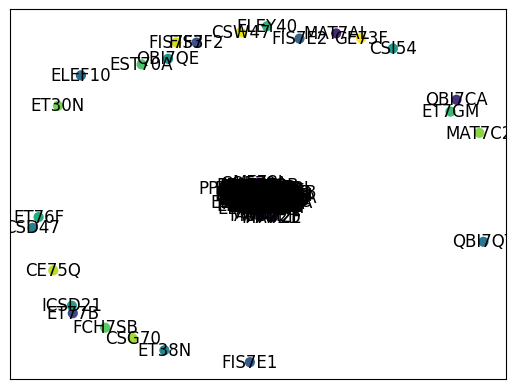

In [4]:
# usa o Louvain para computar a melhor partição
G = digrafo.to_undirected()
partition = community_louvain.best_partition(G)

# Plot do grafo
#Layout
pos = nx.spring_layout(G)
cmap = colormaps['viridis']

nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

nx.draw_networkx_labels(G, pos=pos)

plt.show()


## Demonstração do Leiden

In [6]:
import leidenalg as la
import igraph as ig

#O leiden necessita do pacote iGraph - uso da mesma rede do clube de karatê
H = ig.Graph.Famous('Zachary')

partition = la.find_partition(H, la.ModularityVertexPartition)

ig.plot(partition) 


ModuleNotFoundError: No module named 'leidenalg'

In [ ]:
print(partition.membership)
print(partition.modularity)

## K-clique

In [ ]:
import networkx as nx
from networkx.algorithms.community import k_clique_communities

G = nx.karate_club_graph()


c = list(k_clique_communities(G, 4))

for i in c:
    print(sorted(list(i)))


## Rede do Facebook

In [ ]:
G_facebook = nx.read_edgelist("facebook_combined.txt",create_using = nx.Graph(), nodetype = int)

print(nx.info(G_facebook))

#### Visualização da rede

In [ ]:
# Simula o force-directed layout
sp = nx.spring_layout(G_facebook)

plt.figure(figsize=(20,20))
nx.draw_networkx(G_facebook, pos=sp, with_labels=False, node_size=35)

#### Visualização das comunidades com o Louvain

In [ ]:
import matplotlib.cm as cm
import community as community_louvain
import matplotlib.pyplot as plt
import networkx as nx

clustersFace = community_louvain.best_partition(G_facebook)

cmap = cm.get_cmap('Spectral', max(clustersFace.values()) + 1)
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G_facebook, sp, clustersFace.keys(), node_size=40, cmap=cmap, node_color=list(clustersFace.values()))
nx.draw_networkx_edges(G_facebook, sp, alpha=0.5)
plt.show()

#### Visualização das comunidades com o Louvain e nós redimensionados de acordo com o betweenness

In [ ]:
#arts = c.best_partition(G_fb)
clustersFace

values = [clustersFace.get(node) for node in G_facebook.nodes()]
#pos = nx.spring_layout(G_fb)

betweennessCentrality = nx.betweenness_centrality(G_facebook, normalized=True, endpoints=True)


#Configurações visuais
node_size =  [v * 10000 for v in betweennessCentrality.values()]

plt.figure(figsize=(20,20))

nx.draw_networkx(G_facebook, pos=sp, with_labels=False,
                 node_color=values,
                 node_size=node_size )
plt.axis('off')

## Rede de produtos da Amazon

In [ ]:
G_amazon = nx.read_edgelist('com-amazon.ungraph.txt')
print(nx.info(G_amazon))

In [ ]:
clustersAmazon = list(k_clique_communities(G_amazon,5))

for i in clustersAmazon:
    print(sorted(list(i)))

In [ ]:
# Comunidades validadas

'com-amazon.all.dedup.cmty.txt'


## Conteúdo extra: Visualização com o Netwulf

In [ ]:
#!pip install netwulf

import netwulf as nw
nw.visualize(G_facebook)